In [21]:
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
import numpy as np

In [46]:
filename1 = "data/nate_1.txt"
filename2 = "data/ryan_1.txt"
filename3 = "data/hersh_1.txt"

In [57]:
def read_data(filename):
    data = []
    with open(filename, "r") as file:
        for i, line in enumerate(file):
                data.append([float(val) for val in line.split(",")])
    return list(zip(*data))

In [48]:
def setup_kalman_filter():
    kf = KalmanFilter(dim_x=6, dim_z=3)

    # Define the state transition matrix
    dt = 1.0 / 2  # Time step (adjust according to your IMU's sampling rate)
    kf.F = np.array(
        [
            [1, dt, 0.5 * dt**2, 0, 0, 0],
            [0, 1, dt, 0, 0, 0],
            [0, 0, 1, 0, 0, 0],
            [0, 0, 0, 1, dt, 0.5 * dt**2],
            [0, 0, 0, 0, 1, dt],
            [0, 0, 0, 0, 0, 1],
        ]
    )

    # Measurement function
    kf.H = np.array([[1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1]])

    # Measurement uncertainty
    kf.R = np.eye(3) * 0.1

    # Process uncertainty
    kf.Q = np.eye(6) * 0.1

    # Initial state
    kf.x = np.array([0, 0, 0, 0, 0, 0])

    return kf

In [61]:
data1 = read_data(filename1)
data2 = read_data(filename2)
data3 = read_data(filename3)

min_length = min(len(data1[0]), len(data2[0]), len(data3[0]))
print(min_length)

# Slice the data to the minimum length
data1 = [d[:min_length] for d in data1]
data2 = [d[:min_length] for d in data2]
data3 = [d[:min_length] for d in data3]
data1

862


[(0.6278076171875,
  0.5653076171875,
  0.517333984375,
  0.5045166015625,
  0.4925537109375,
  0.47802734375,
  0.478759765625,
  0.4698486328125,
  0.460205078125,
  0.4686279296875,
  0.471923828125,
  0.4700927734375,
  0.47900390625,
  0.4893798828125,
  0.4886474609375,
  0.49365234375,
  0.5064697265625,
  0.5047607421875,
  0.5010986328125,
  0.49560546875,
  0.49609375,
  0.5001220703125,
  0.501220703125,
  0.4810791015625,
  0.4827880859375,
  0.4888916015625,
  0.48779296875,
  0.480712890625,
  0.4854736328125,
  0.5001220703125,
  0.4522705078125,
  0.471435546875,
  0.4525146484375,
  0.453857421875,
  0.4688720703125,
  0.4739990234375,
  0.4625244140625,
  0.3961181640625,
  0.4049072265625,
  0.41845703125,
  0.4559326171875,
  0.514404296875,
  0.6151123046875,
  0.88916015625,
  1.2603759765625,
  1.6007080078125,
  1.7362060546875,
  1.752685546875,
  1.9295654296875,
  1.3607177734375,
  0.8702392578125,
  1.1907958984375,
  1.7344970703125,
  0.537353515625,
  -0

In [62]:
# Time vector (assuming each sample is taken at a constant time interval)
time = [(10 / min_length) * i for i in range(min_length)]

In [65]:
# Plotting function for each type of data
def plot_data(ax, data, label, title):
    for d, label_suffix in zip(data, ["Nate", "Ryan", "Hersh"]):
        ax.plot(time, d, label=f"{label_suffix}")
    ax.set_title(title)
    ax.set_xlabel("Time (sample number)")
    ax.set_ylabel("Value")
    ax.legend()

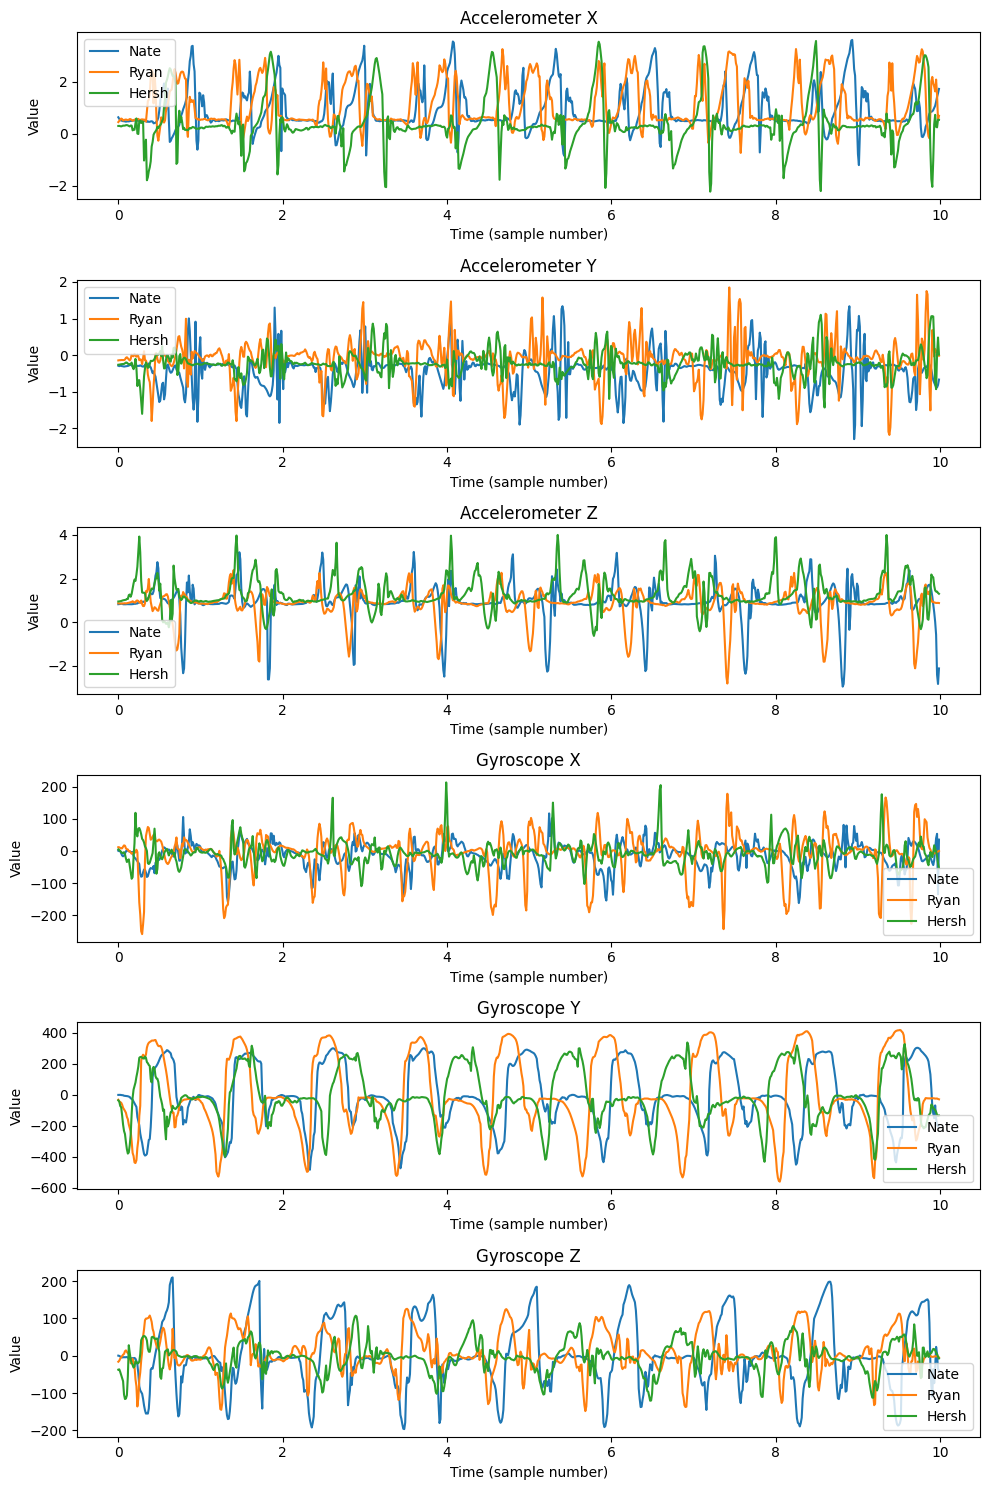

In [66]:
fig, axs = plt.subplots(6, 1, figsize=(10, 15))  # Adjust the size as needed

# Plot each graph
plot_data(axs[0], [data1[0], data2[0], data3[0]], "ax", "Accelerometer X")
plot_data(axs[1], [data1[1], data2[1], data3[1]], "ay", "Accelerometer Y")
plot_data(axs[2], [data1[2], data2[2], data3[2]], "az", "Accelerometer Z")
plot_data(axs[3], [data1[3], data2[3], data3[3]], "gx", "Gyroscope X")
plot_data(axs[4], [data1[4], data2[4], data3[4]], "gy", "Gyroscope Y")
plot_data(axs[5], [data1[5], data2[5], data3[5]], "gz", "Gyroscope Z")

# Display the plot
plt.tight_layout()
plt.show()

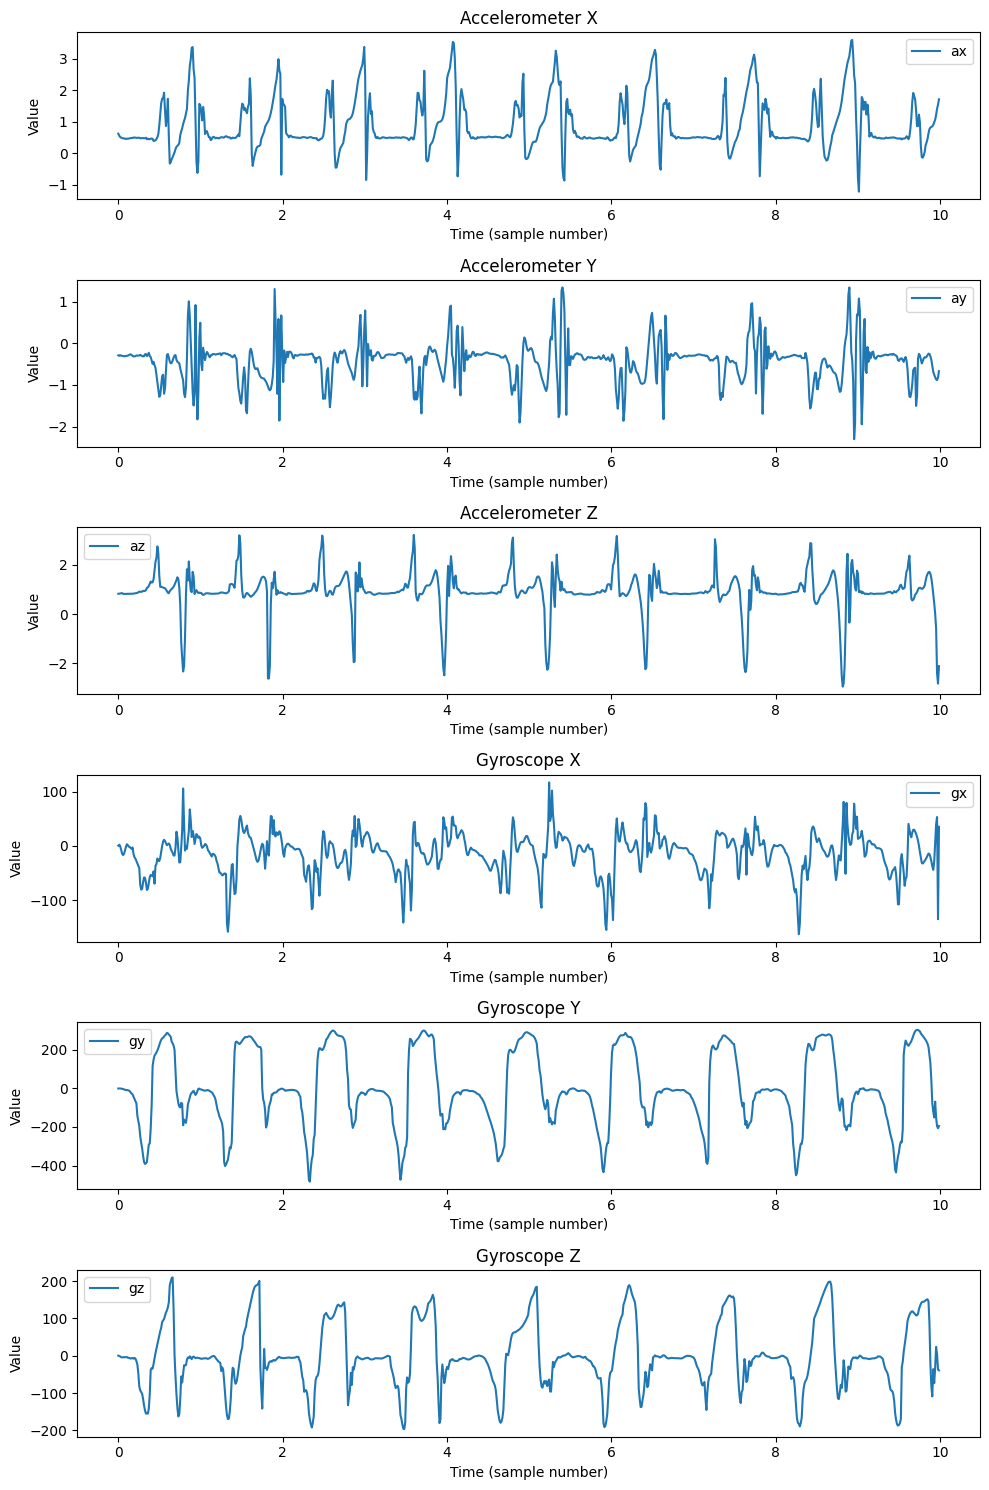

In [45]:
# Create subplots
fig, axs = plt.subplots(6, 1, figsize=(10, 15))  # Adjust the size as needed

# Plot each graph
axs[0].plot(time, ax, label="ax")
axs[0].set_title("Accelerometer X")
axs[1].plot(time, ay, label="ay")
axs[1].set_title("Accelerometer Y")
axs[2].plot(time, az, label="az")
axs[2].set_title("Accelerometer Z")
axs[3].plot(time, gx, label="gx")
axs[3].set_title("Gyroscope X")
axs[4].plot(time, gy, label="gy")
axs[4].set_title("Gyroscope Y")
axs[5].plot(time, gz, label="gz")
axs[5].set_title("Gyroscope Z")

# Add labels and legends
for _ax in axs:
    _ax.set_xlabel("Time (sample number)")
    _ax.set_ylabel("Value")
    _ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

Estimated Final Position: [ 32.63919564 -16.11108723  35.19296619]


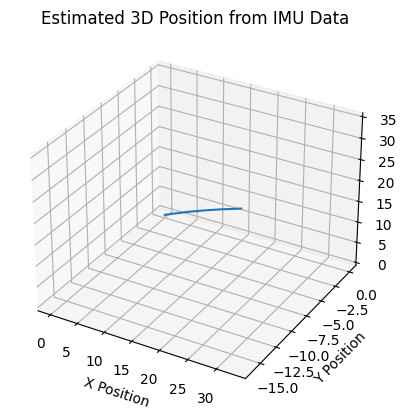

In [31]:
IMU_data = np.array(data)

# Define the sampling rate (Hz) of your IMU
sampling_rate = 100  # Adjust this based on your actual IMU sampling rate
sampling_interval = 1.0 / sampling_rate

# Initialize arrays to store velocity and position
velocity = np.zeros_like(IMU_data[:, :3])  # [vx, vy, vz]
position = np.zeros_like(IMU_data[:, :3])  # [px, py, pz]

# Iterate through the IMU data to calculate velocity and position
for i in range(1, len(IMU_data)):
    # Numerical integration (simple rectangular method) to find velocity
    velocity[i] = velocity[i - 1] + IMU_data[i, :3] * sampling_interval

    # Another integration to find position
    position[i] = position[i - 1] + velocity[i] * sampling_interval

# Example: Print the final estimated position
print("Estimated Final Position:", position[-1])

# If you want to plot the result
try:
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    _ax = fig.add_subplot(111, projection="3d")
    _ax.plot(position[:, 0], position[:, 1], position[:, 2])
    _ax.set_xlabel("X Position")
    _ax.set_ylabel("Y Position")
    _ax.set_zlabel("Z Position")
    plt.title("Estimated 3D Position from IMU Data")
    plt.show()
except ImportError:
    print("Matplotlib not installed. Can't plot the data.")

Estimated Final Position: [1.72337024 0.36709471 0.06522804]


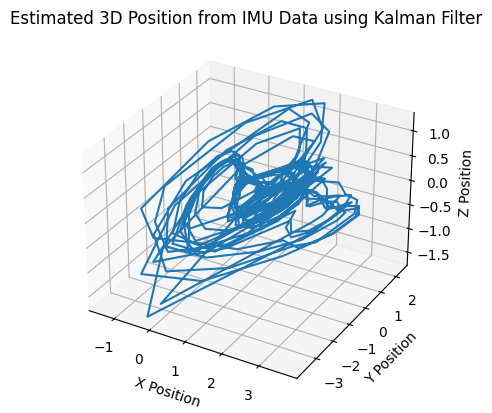

In [33]:
# Initialize the Kalman Filter
kf = setup_kalman_filter()

# Prepare arrays for storing estimated positions
positions = []

for measurement in data:
    # Use only accelerometer data for the update step
    acc_data = measurement[:3]

    # Update Kalman Filter
    kf.predict()
    kf.update(acc_data)

    # Extract and store position (x, y, z)
    positions.append(kf.x[:3])

positions = np.array(positions)

# Print the final estimated position
print("Estimated Final Position:", positions[-1])

# Plotting (if desired)
try:
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    _ax = fig.add_subplot(111, projection="3d")
    _ax.plot(positions[:, 0], positions[:, 1], positions[:, 2])
    _ax.set_xlabel("X Position")
    _ax.set_ylabel("Y Position")
    _ax.set_zlabel("Z Position")
    plt.title("Estimated 3D Position from IMU Data using Kalman Filter")
    plt.show()
except ImportError:
    print("Matplotlib not installed. Can't plot the data.")